# Optimising IO through asynchronous transfers



In [13]:
%matplotlib widget

import os
import sys
import numpy as np
import subprocess
from matplotlib import pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

sys.path.insert(0, os.path.abspath("../include"))

import py_helper

float_type = np.float32

defines=py_helper.load_defines("mat_size.hpp")

# Velocity of the medium
vel=333.0

# Make up the velocity and first two timesteps
V=np.ones((defines["N0"], defines["N1"]), dtype=float_type)*vel

# write files to disk
V.tofile("array_V.dat")

In [14]:
# Run the application under Tau
subprocess.run(os.path.join(os.getcwd(),"wave2d_async.exe"))

	               name: Intel(R) FPGA Emulation Device 
	 global memory size: 32880 MB
	    max buffer size: 16440 MB
	     max local size: (67108864,67108864,67108864)
	     max work-items: 67108864
dt=0.001201, Vmax=333.000000
dt=0.0012012, fm=33.3, Vmax=333, dt2=1.44288e-06


CompletedProcess(args='/home/toby/Pelagos/Projects/OpenCL_Course/course_material/L9_Asynchronous_IO/wave2d_async.exe', returncode=0)

In [15]:
# Read the outputfile back in for display
output=np.fromfile("array_out.dat", dtype=float_type)
nslices=output.size//(defines["N0"]*defines["N1"])
output=output.reshape(nslices, defines["N0"], defines["N1"])

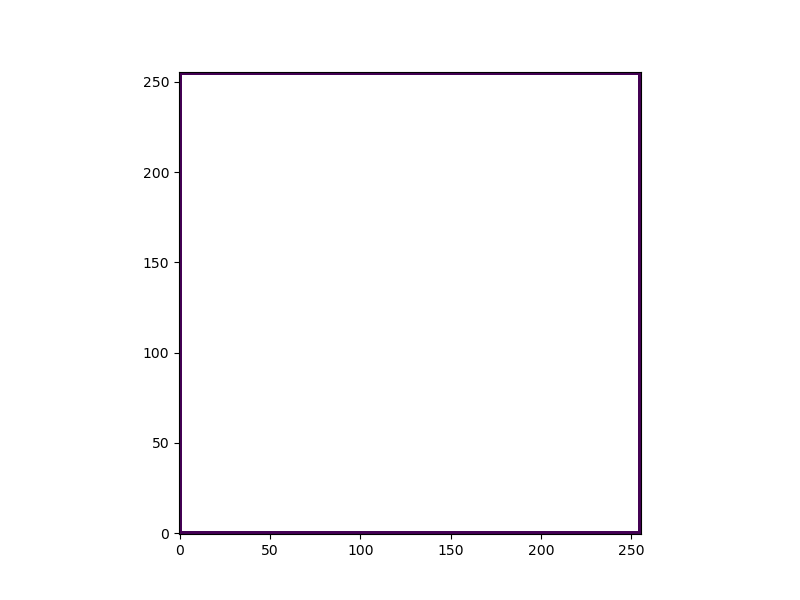

In [16]:
# Animate the result
fig, ax = plt.subplots(1,1, figsize=(8,6))
extent=[ -0.5*defines["D1"], (defines["N1"]-0.5)*defines["D1"],
    -0.5*defines["D0"], (defines["N0"]-0.5)*defines["D0"]]
img = ax.imshow(
    output[0,...], 
    extent=extent, 
    vmin=np.min(output), 
    vmax=np.max(output),
    origin="lower"
)

def init():
    img.set_data(output[0,...])
    return (img,)

def update(n):
    img.set_data(output[n,...])
    return (img,)

movie = animation.FuncAnimation(
    fig, 
    update, 
    init_func=init,
    interval=1,
    frames=output.shape[0],
    blit=True
)

rc('animation', html='jshtml')
rc

HTML(movie.to_jshtml())

#plt.show()